In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
from scipy import stats as sc
import statsmodels.api as sm
import sklearn as sk


In [2]:
data = pd.read_csv('NIGGA.csv')
data

,PolicyID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density
0,1,0,0.090000,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
1,2,0,0.840000,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
2,3,0,0.520000,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
3,4,0,0.450000,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
4,5,0,0.150000,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60
...,...,...,...,...,...,...,...,...,...,...
413164,413165,0,0.002740,j,0,29,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,2471
413165,413166,0,0.005479,d,0,29,Japanese (except Nissan) or Korean,Regular,Ile-de-France,5360
413166,413167,0,0.005479,k,0,49,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,5360
413167,413168,0,0.002740,d,0,41,Japanese (except Nissan) or Korean,Regular,Ile-de-France,9850


In [3]:
data = data.drop_duplicates(subset=['Power', 'CarAge', 'DriverAge', 'Brand', 'Gas', 'Region', 'Density'], keep='first')
data

,PolicyID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density
0,1,0,0.090000,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
2,3,0,0.520000,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
4,5,0,0.150000,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60
6,7,0,0.810000,d,1,27,Japanese (except Nissan) or Korean,Regular,Aquitaine,695
7,8,0,0.050000,d,0,27,Japanese (except Nissan) or Korean,Regular,Aquitaine,695
...,...,...,...,...,...,...,...,...,...,...
413163,413164,0,0.005479,d,0,61,Japanese (except Nissan) or Korean,Regular,Basse-Normandie,205
413164,413165,0,0.002740,j,0,29,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,2471
413165,413166,0,0.005479,d,0,29,Japanese (except Nissan) or Korean,Regular,Ile-de-France,5360
413166,413167,0,0.005479,k,0,49,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,5360


In [4]:
data.reset_index(inplace=True)


In [5]:
data['GroupID'] = data.index+1
data

/tmp/ipykernel_209430/851239075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GroupID'] = data.index+1


,index,PolicyID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density,GroupID
0,0,1,0,0.090000,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,1
1,2,3,0,0.520000,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,2
2,4,5,0,0.150000,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60,3
3,6,7,0,0.810000,d,1,27,Japanese (except Nissan) or Korean,Regular,Aquitaine,695,4
4,7,8,0,0.050000,d,0,27,Japanese (except Nissan) or Korean,Regular,Aquitaine,695,5
...,...,...,...,...,...,...,...,...,...,...,...,...
299794,413163,413164,0,0.005479,d,0,61,Japanese (except Nissan) or Korean,Regular,Basse-Normandie,205,299795
299795,413164,413165,0,0.002740,j,0,29,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,2471,299796
299796,413165,413166,0,0.005479,d,0,29,Japanese (except Nissan) or Korean,Regular,Ile-de-France,5360,299797
299797,413166,413167,0,0.005479,k,0,49,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,5360,299798


In [6]:
data.drop(['PolicyID'], axis = 1, inplace=True)

/tmp/ipykernel_209430/1178436563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['PolicyID'], axis = 1, inplace=True)


In [7]:
data.drop(['index'],axis=1, inplace=True)

/tmp/ipykernel_209430/1855656603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['index'],axis=1, inplace=True)


In [8]:
data =  data[['GroupID','ClaimNb','Exposure','Power','CarAge','DriverAge','Brand','Gas','Region','Density']]


Text(0.5, 1.0, 'QQ-Plot for ClaimNb and Poisson Dist')

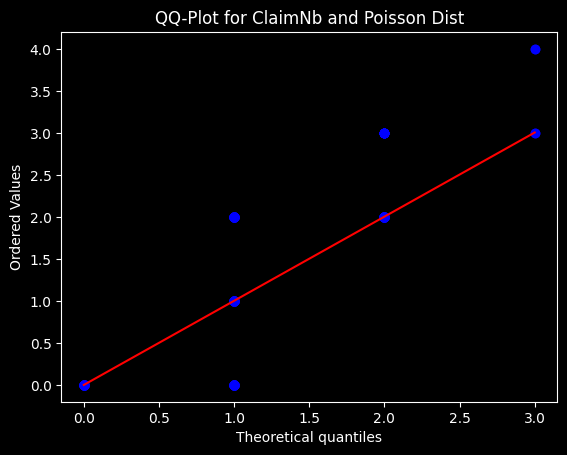

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = data['ClaimNb']
res = sc.probplot(x, dist=sc.poisson , sparams=(0.043162), plot=ax)
ax.set_title("QQ-Plot for ClaimNb and Poisson Dist")

/home/pc/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ClaimNb', ylabel='Probability'>

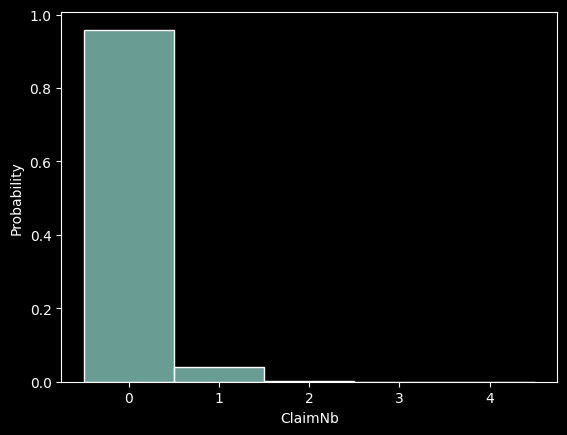

In [11]:
sns.histplot(data['ClaimNb'], stat='probability', discrete= True)

In [14]:
data['Brand'].value_counts()

Brand
Renault, Nissan or Citroen            168032
Japanese (except Nissan) or Korean     43192
Opel, General Motors or Ford           28710
Volkswagen, Audi, Skoda or Seat        24765
Mercedes, Chrysler or BMW              14622
Fiat                                   12749
other                                   7729
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import OrdinalEncoder
x = np.array(data['Brand']).reshape(-1,1)
enc = OrdinalEncoder()
enc.fit(x)
encoded = enc.transform(x)


In [13]:
data['Brand_enc'] = encoded
data

/tmp/ipykernel_209430/1967568456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Brand_enc'] = encoded


,GroupID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density,Brand_enc
0,1,0,0.090000,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,1.0
1,2,0,0.520000,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,1.0
2,3,0,0.150000,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60,1.0
3,4,0,0.810000,d,1,27,Japanese (except Nissan) or Korean,Regular,Aquitaine,695,1.0
4,5,0,0.050000,d,0,27,Japanese (except Nissan) or Korean,Regular,Aquitaine,695,1.0
...,...,...,...,...,...,...,...,...,...,...,...
299794,299795,0,0.005479,d,0,61,Japanese (except Nissan) or Korean,Regular,Basse-Normandie,205,1.0
299795,299796,0,0.002740,j,0,29,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,2471,1.0
299796,299797,0,0.005479,d,0,29,Japanese (except Nissan) or Korean,Regular,Ile-de-France,5360,1.0
299797,299798,0,0.005479,k,0,49,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,5360,1.0


In [14]:

y = np.array(data['Region']).reshape(-1,1)
enc = OrdinalEncoder()
enc.fit(y)
encoded_region = enc.transform(y)
data['Region_enc'] = encoded_region


/tmp/ipykernel_209430/3350197151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Region_enc'] = encoded_region


In [15]:

z = np.array(data['Gas']).reshape(-1,1)
enc = OrdinalEncoder()
enc.fit(z)
gas_enc = enc.transform(z)
data['Gas_enc'] = gas_enc


/tmp/ipykernel_209430/4232386343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gas_enc'] = gas_enc


In [16]:
a = np.array(data['Power']).reshape(-1,1)
enc = OrdinalEncoder()
enc.fit(a)
power_enc = enc.transform(a)
data['Power_enc'] = power_enc

/tmp/ipykernel_209430/655542138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Power_enc'] = power_enc


In [17]:
log_density = np.log(np.array(data['Density']))
print(log_density)

[4.33073334 8.00736707 4.09434456 ... 8.58671925 8.58671925 4.17438727]


In [18]:
data['log_density'] = log_density
data

/tmp/ipykernel_209430/4217033218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_density'] = log_density


,GroupID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density,Brand_enc,Region_enc,Gas_enc,Power_enc,log_density
0,1,0,0.090000,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,1.0,0.0,0.0,3.0,4.330733
1,2,0,0.520000,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,1.0,7.0,1.0,2.0,8.007367
2,3,0,0.150000,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60,1.0,8.0,0.0,3.0,4.094345
3,4,0,0.810000,d,1,27,Japanese (except Nissan) or Korean,Regular,Aquitaine,695,1.0,0.0,1.0,0.0,6.543912
4,5,0,0.050000,d,0,27,Japanese (except Nissan) or Korean,Regular,Aquitaine,695,1.0,0.0,1.0,0.0,6.543912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299794,299795,0,0.005479,d,0,61,Japanese (except Nissan) or Korean,Regular,Basse-Normandie,205,1.0,1.0,1.0,0.0,5.323010
299795,299796,0,0.002740,j,0,29,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,2471,1.0,5.0,0.0,6.0,7.812378
299796,299797,0,0.005479,d,0,29,Japanese (except Nissan) or Korean,Regular,Ile-de-France,5360,1.0,5.0,1.0,0.0,8.586719
299797,299798,0,0.005479,k,0,49,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,5360,1.0,5.0,0.0,7.0,8.586719


In [25]:
data.to_csv('Clean_data.csv')

In [19]:
heatmap_data = data.drop(['GroupID', 'Power', 'Brand', 'Gas', 'Region', 'Density'], axis=1)

<Axes: xlabel='DriverAge', ylabel='ClaimNb'>

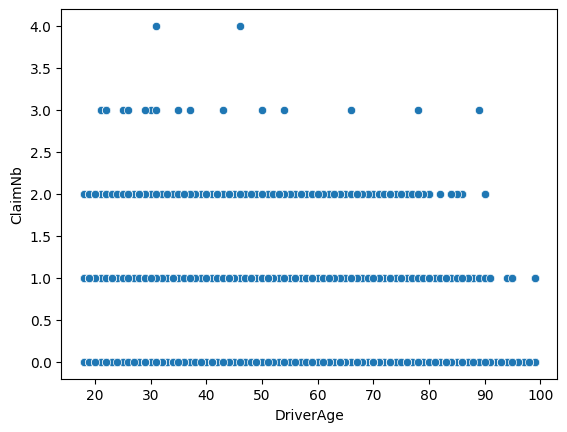

In [20]:
scatterplot_data = heatmap_data[['ClaimNb', 'DriverAge']]
plt.style.use('default')
sns.scatterplot(data=scatterplot_data, x='DriverAge', y='ClaimNb')


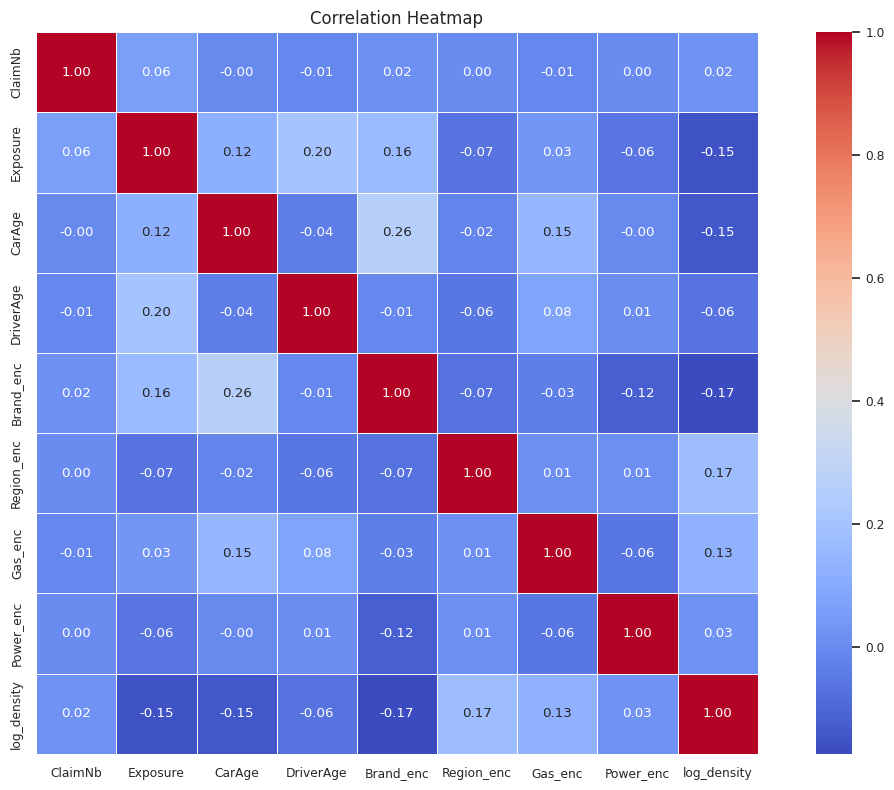

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataset (299,000 rows and 11 columns)

# Step 1: Compute the correlation matrix
# This is faster and ensures you’re not recalculating correlations repeatedly
corr_matrix = heatmap_data.corr()

# Step 2: Optimize visualization settings
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility
sns.set(font_scale=0.8)  # Adjust font size if the heatmap is cluttered

# Step 3: Generate the heatmap
sns.heatmap(corr_matrix, 
            annot=True,  # Set to True if you want to display correlation values
            fmt=".2f",    # Format for annotation (if enabled)
            cmap="coolwarm",  # Colormap for better visualization
            cbar=True,    # Show color bar
            square=True,  # Makes cells square for better proportions
            linewidths=0.5,  # Add lines between cells
            linecolor='white')  # Line color for separation
plt.style.use('default')
# Step 4: Show the plot
plt.title("Correlation Heatmap")
plt.tight_layout()  # Avoid clipping
plt.show()


Text(0.5, 1.0, 'Exposure Boxplot')

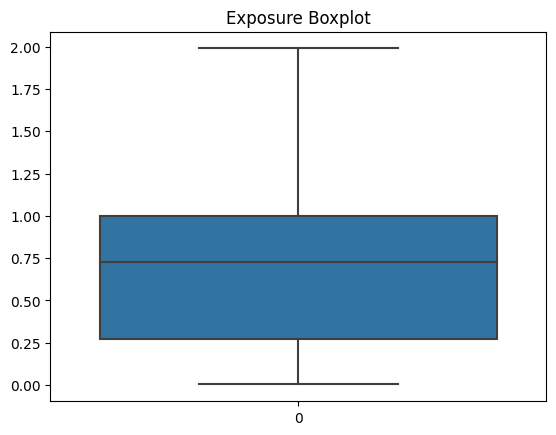

In [25]:
sns.boxplot(data['Exposure'])
plt.title('Exposure Boxplot')


In [23]:
clean = pd.to('Cleaned_data1.csv')
clean

AttributeError: module 'pandas' has no attribute 'to_csv'

In [35]:
clean['Power'].value_counts()

Gas
Regular    152867
Diesel     146932
Name: count, dtype: int64

In [26]:
clean['Power_enc'].value_counts()

NameError: name 'clean' is not defined